In [23]:
# import the libraries 

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# connect to database

conn = sqlite3.connect('../data/prod_sample.db')

In [71]:
# identify tables in database

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('stock_description',), ('online_retail_history',)]


In [72]:
# write a sql query that extracts the data from the data base

query = """
select *
from online_retail_history
where customerid is not null
"""

online_retail_history = pd.read_sql(query, conn)

In [73]:
online_retail_history

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
...,...,...,...,...,...,...,...
406825,581587,22899,6,2011-12-09 12:50:00,2.10,u1268,France
406826,581587,23254,4,2011-12-09 12:50:00,4.15,u1268,France
406827,581587,23255,4,2011-12-09 12:50:00,4.15,u1268,France
406828,581587,22138,3,2011-12-09 12:50:00,4.95,u1268,France


In [74]:
# structure of the data

online_retail_history.info()

# we have 5 variables with data type object and 2 numerical variables
# invoice date should have the data tpe datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406830 entries, 0 to 406829
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Quantity     406830 non-null  int64  
 3   InvoiceDate  406830 non-null  object 
 4   Price        406830 non-null  float64
 5   CustomerID   406830 non-null  object 
 6   Country      406830 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.7+ MB


In [75]:
# summary statistics for price and quantity

online_retail_history.describe()

,Quantity,Price
count,406830.000000,406830.000000
mean,12.061276,3.460507
std,248.693065,69.315080
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [76]:
# examples of rows of data where quantity is less than 0

online_retail_history[online_retail_history.Quantity < 0]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
141,C536379,D,-1,2010-12-01 09:41:00,27.50,u14527,United Kingdom
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,u15311,United Kingdom
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,u17548,United Kingdom
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,u17548,United Kingdom
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,u17548,United Kingdom
...,...,...,...,...,...,...,...
406377,C581490,23144,-11,2011-12-09 09:57:00,0.83,u14397,United Kingdom
406461,C581499,M,-1,2011-12-09 10:28:00,224.69,u15498,United Kingdom
406635,C581568,21258,-5,2011-12-09 11:57:00,10.95,u15311,United Kingdom
406636,C581569,84978,-1,2011-12-09 11:58:00,1.25,u17315,United Kingdom


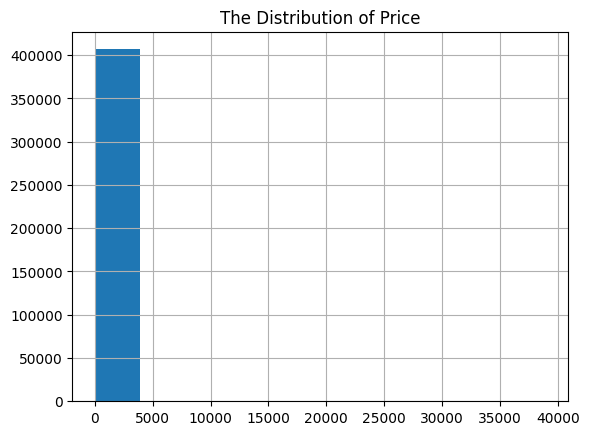

In [77]:
online_retail_history.Price.hist()
plt.title("The Distribution of Price");

In [81]:
# removing rows of data where price more than 20 and quantity less than 0

query = """
select *
from online_retail_history
where customerid is not null
    and quantity > 0
    and price < 20
"""

online_retail_history = pd.read_sql(query, conn)

In [82]:
online_retail_history.describe()

,Quantity,Price
count,396802.000000,396802.000000
mean,13.052550,2.807251
std,180.673988,2.783196
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,19.960000


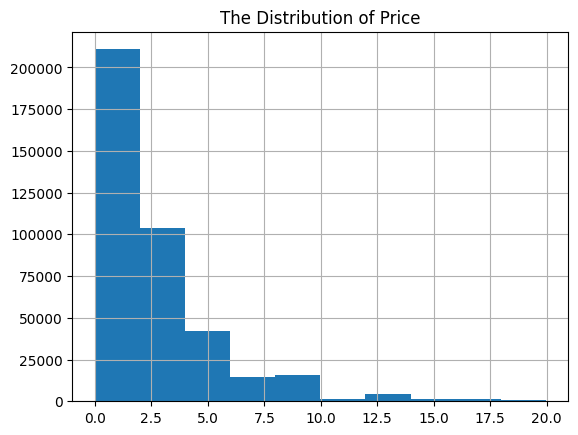

In [83]:
online_retail_history.Price.hist()
plt.title("The Distribution of Price");

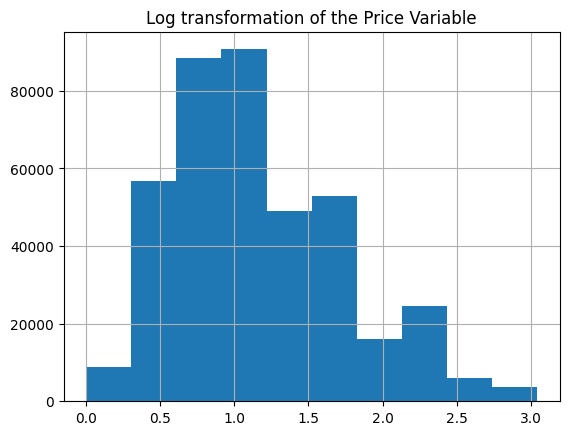

In [68]:
# can use logarithms to transform the data

np.log(online_retail_history.Price + 1).hist()
plt.title("Log transformation of the Price Variable");

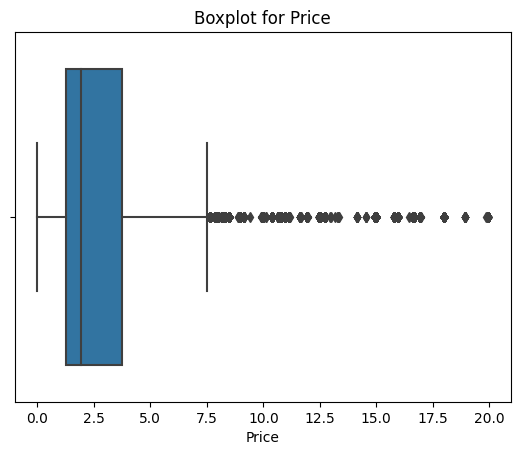

In [84]:
# visualising price as boxplot

sns.boxplot(x=online_retail_history.Price)
plt.title("Boxplot for Price");

In [48]:
# calculating the upper bound and lower bound for price

q3 = 3.75
q1 = 1.25

#q3 = np.percentile(online_retail_history.Price, 75)
#q1 = np.percentile(online_retail_history.Price, 25)

iqr = q3 - q1

lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

In [49]:
print("The lower bound is:",lb)
print("The upper bound is:",ub)


The lower bound is: -2.5
The upper bound is: 7.5


In [50]:
# identifying the rows where price is greater than upper bound

online_retail_history[online_retail_history.Price > ub]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
5,536365,22752,2,2010-12-01 08:26:00,7.65,u1785,United Kingdom
20,536367,22622,2,2010-12-01 08:34:00,9.95,u13047,United Kingdom
23,536367,21777,4,2010-12-01 08:34:00,7.95,u13047,United Kingdom
24,536367,48187,4,2010-12-01 08:34:00,7.95,u13047,United Kingdom
45,536370,POST,3,2010-12-01 08:45:00,18.00,u12583,France
...,...,...,...,...,...,...,...
396678,581578,22622,6,2011-12-09 12:16:00,11.95,u12713,Germany
396723,581579,22941,4,2011-12-09 12:19:00,8.50,u17581,United Kingdom
396744,581580,22894,2,2011-12-09 12:20:00,9.95,u12748,United Kingdom
396784,581586,21217,24,2011-12-09 12:49:00,8.95,u13113,United Kingdom


In [51]:
# approx. 10% of the data has price greater than upper bound

online_retail_history[online_retail_history.Price > ub].shape[0]/online_retail_history.shape[0]*100

8.375461817228743

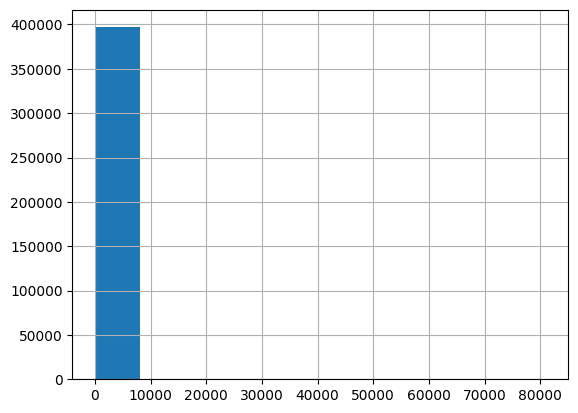

In [52]:
# looking 

online_retail_history.Quantity.hist();

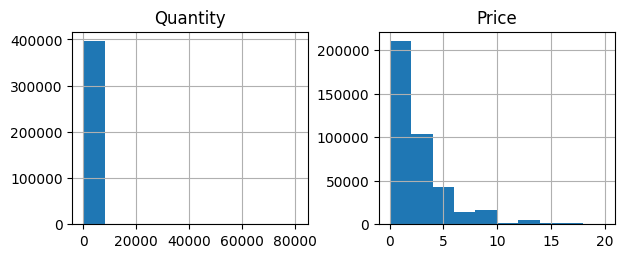

In [90]:
online_retail_history.hist(figsize=(7,2.5));

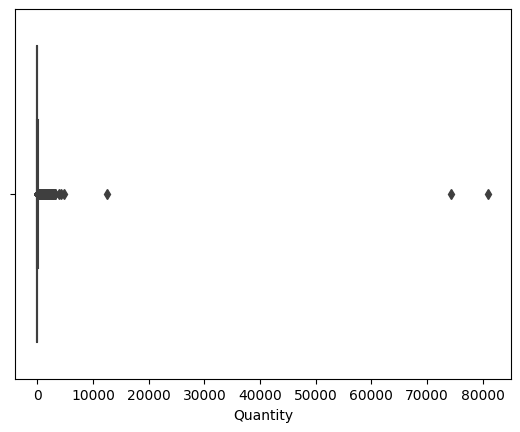

In [53]:
# boxplot for quantity

sns.boxplot(x=online_retail_history.Quantity);

In [54]:
online_retail_history.Quantity.describe()

count    396802.000000
mean         13.052550
std         180.673988
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [55]:
# q3 = 12
# q1 = 2

q3 = np.percentile(online_retail_history.Quantity, 75)
q1 = np.percentile(online_retail_history.Quantity, 25)

iqr = q3 - q1
print(iqr)

lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr

print("The lower bound is:",lb)
print("The upper bound is:",ub)

10.0
The lower bound is: -13.0
The upper bound is: 27.0


In [56]:
online_retail_history[online_retail_history.Quantity > ub]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
13,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom
31,536370,10002,48,2010-12-01 08:45:00,0.85,u12583,France
44,536370,22492,36,2010-12-01 08:45:00,0.65,u12583,France
46,536371,22086,80,2010-12-01 09:00:00,2.55,u13748,United Kingdom
65,536374,21258,32,2010-12-01 09:09:00,10.95,u151,United Kingdom
...,...,...,...,...,...,...,...
396727,581579,23581,40,2011-12-09 12:19:00,1.79,u17581,United Kingdom
396757,581583,20725,40,2011-12-09 12:23:00,1.45,u13777,United Kingdom
396758,581583,85038,36,2011-12-09 12:23:00,1.85,u13777,United Kingdom
396759,581584,20832,72,2011-12-09 12:25:00,0.72,u13777,United Kingdom


In [59]:
# correlations

online_retail_history.corr(numeric_only = True)

,Quantity,Price
Quantity,1.000000,-0.029261
Price,-0.029261,1.000000


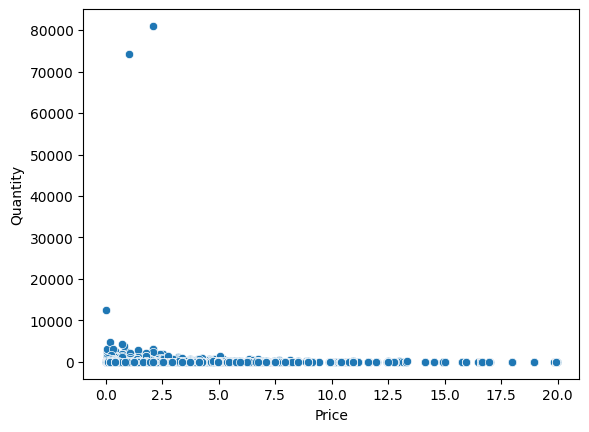

In [61]:
sns.scatterplot(y='Quantity', x='Price', data=online_retail_history);

In [62]:
online_retail_history.Country.value_counts()

Country
United Kingdom          353678
Germany                   9019
France                    8329
EIRE                      7123
Spain                     2419
Netherlands               2357
Belgium                   2027
Switzerland               1811
Portugal                  1425
Australia                 1184
Norway                    1046
Channel Islands            743
Italy                      741
Finland                    648
Cyprus                     604
Sweden                     431
Austria                    384
Denmark                    380
Poland                     322
Japan                      321
Israel                     245
Unspecified                244
Singapore                  213
Iceland                    182
USA                        179
Canada                     150
Greece                     141
Malta                      109
United Arab Emirates        67
European Community          60
RSA                         58
Lebanon                     45


In [63]:
len(online_retail_history.Country.unique())

37

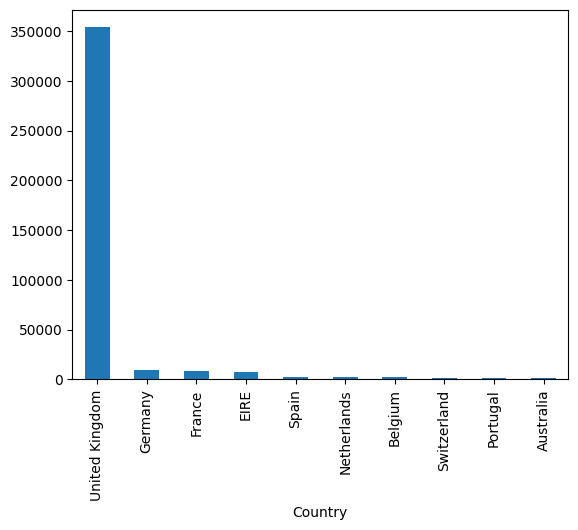

In [66]:
online_retail_history.Country.value_counts().nlargest(10).plot(kind='bar');